In [2]:
import pandas as pd
df = pd.read_csv("./Datos/kepler_koi_search.txt")
df.drop(0,axis=0,inplace=True)

#df = df[(df["NExScI Disposition"]=="CONFIRMED") | (df["NExScI Disposition"]=="FALSE POSITIVE" )]

#df = df[(df["NExScI Disposition"] == "CANDIDATE")]
#import numpy as np
#df = df[np.isfinite(df['DV Summary'])]
df.dropna(subset=["DV Summary"],inplace=True)
df.head()

,Kepler ID,KOI Name,Kepler Name,Kepler Disposition,NExScI Disposition,RA (J2000),Dec (J2000),Time of Transit Epoch,Period,Transit Depth,...,DV Summary,Transit Flag,Secondary Flag,Offset Flag,Contamination Flag,Disposition Score,Teq.1,Stellar Radius.1,Stellar Mass.1,Age.1
1,757450,K00889.01,Kepler-75 b,CANDIDATE,CONFIRMED,19 24 33.024,+36 34 38.57,169.991686,8.884922995,16053.4,...,/missions/kepler/dv_files/0007/000757450/kplr0...,0,0,0,0,0.999,770,0.843,0.821,NaN
2,892772,K01009.01,NaN,FALSE POSITIVE,FALSE POSITIVE,19 24 36.811,+36 40 43.83,357.53594,5.09246539,254.0,...,/missions/kepler/dv_files/0008/000892772/kplr0...,0,0,1,0,0,844,0.751,0.727,NaN
3,1025986,K07621.01,NaN,FALSE POSITIVE,FALSE POSITIVE,19 24 08.086,+36 46 15.75,315.2486,275.07365,228.9,...,/missions/kepler/dv_files/0010/001025986/kplr0...,1,0,0,0,0,303,1.187,0.864,NaN
4,1026032,K06252.01,NaN,FALSE POSITIVE,FALSE POSITIVE,19 24 10.577,+36 43 45.38,133.7744903,8.460438928,76412.9,...,/missions/kepler/dv_files/0010/001026032/kplr0...,0,1,0,0,0,804,0.702,0.796,NaN
5,1026957,K00958.01,NaN,CANDIDATE,CANDIDATE,19 25 01.078,+36 44 37.00,166.540438,21.76129812,1300.7,...,/missions/kepler/dv_files/0010/001026957/kplr0...,0,0,0,0,1,486,0.720,0.781,NaN


In [6]:
df["NExScI Disposition"].value_counts()

FALSE POSITIVE    3976
CONFIRMED         2281
CANDIDATE         1797
Name: NExScI Disposition, dtype: int64

In [5]:
df.shape

(8054, 48)

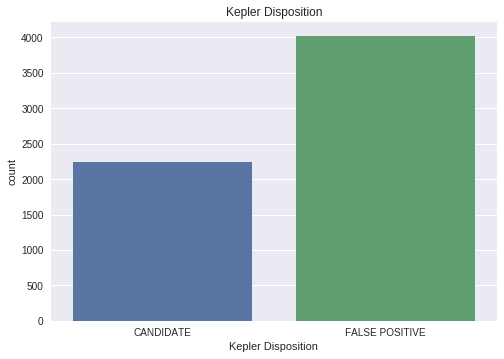

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Kepler Disposition',data =df)
plt.title('Kepler Disposition')
plt.show()

/home/panshop/anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


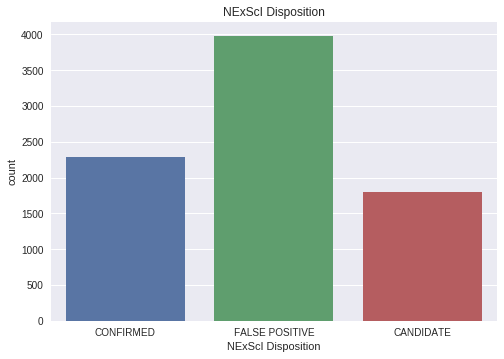

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='NExScI Disposition',data =df)
plt.title('NExScI Disposition')
plt.show()

In [3]:
from astropy.coordinates import ICRS, Galactic
from astropy import units as u
from astropy.coordinates import Angle
from astropy.coordinates import SkyCoord

b = df["Dec (J2000)"].values[0]
a = df["RA (J2000)"].values[0]

c = SkyCoord(a+" "+b, unit=(u.deg, u.deg))

Skycoords = [ SkyCoord(a+" "+b, unit=(u.deg, u.deg)) 
             for a,b in zip(df["RA (J2000)"].values, df["Dec (J2000)"].values)]

#print c.ra.deg

In [4]:
import numpy as np
x = np.asarray(map( lambda x: x.ra.deg, Skycoords ))
y = np.asarray(map( lambda x: x.dec.deg, Skycoords ))

In [17]:
etiqueta = pd.factorize(df["NExScI Disposition"])

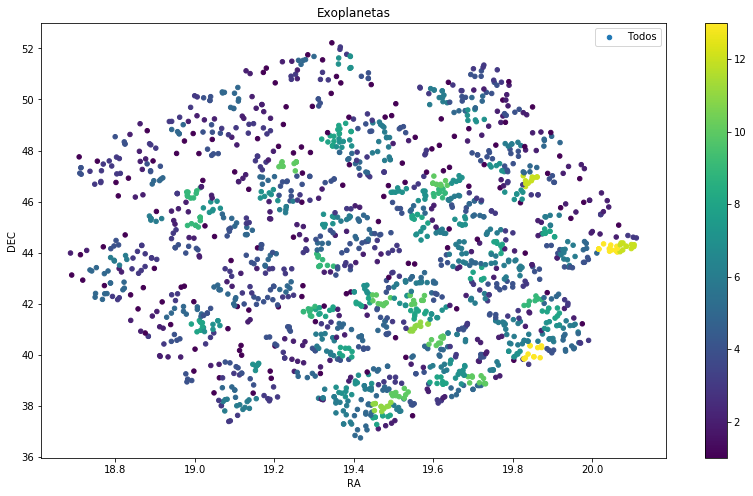

In [9]:
#x = df["RA (J2000)"]
#y = df["Dec (J2000)"]
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))

mask_candidate = df['NExScI Disposition'].values == "CANDIDATE"
#mask_fpositive_ = df['NExScI Disposition'] == "FALSE POSITIVE"

#plt.scatter(x[mask_confirmed],y[mask_confirmed],s=20,label="CONFIRMED")
#plt.scatter(x[mask_fpositive_],y[mask_fpositive_],s=20,label="FALSE POSITIVE")

hist, xedges, yedges = np.histogram2d(x[mask_candidate], y[mask_candidate],30)
xidx = np.clip(np.digitize(x[mask_candidate], xedges) - 1, 0, hist.shape[0] - 1)
yidx = np.clip(np.digitize(y[mask_candidate], yedges) - 1, 0, hist.shape[1] - 1)
c = hist[xidx, yidx]

plt.scatter(x[mask_candidate],y[mask_candidate],s=20,label="Todos",c=c)

plt.legend()
plt.colorbar()

plt.xlabel("RA")
plt.ylabel("DEC")
plt.title("Exoplanetas")
plt.show()

### Descargar FITS

In [9]:
import urllib2
from bs4 import BeautifulSoup
import numpy as np

f = open("fits_candidatos.txt","w")
for kepler_object,i in zip(df["DV Report"].values,range(df.shape[0])):
    if isinstance(kepler_object, basestring):
        if df["NExScI Disposition"].values[i] == "CANDIDATE": #only save not cantidate objects
            #print kepler_object
            ruta = "http://archive.stsci.edu" + '/'.join(kepler_object.split("/")[:-1])

            request = urllib2.Request(ruta)
            response = urllib2.urlopen(request)
            soup = BeautifulSoup(response)
            for a in soup.findAll('a'): #busca link
                if 'fits' in a['href']:
                    ruta_fits = ruta+"/"+a['href']
                    f.write(ruta_fits+"\n")
f.close()
print "listo"

listo


In [20]:
f = open("fits.txt","r")
links = 0
for linea in f.readlines():
    if linea != "":
        links+=1
print "cantidad links: ",links

cantidad links:  6257
